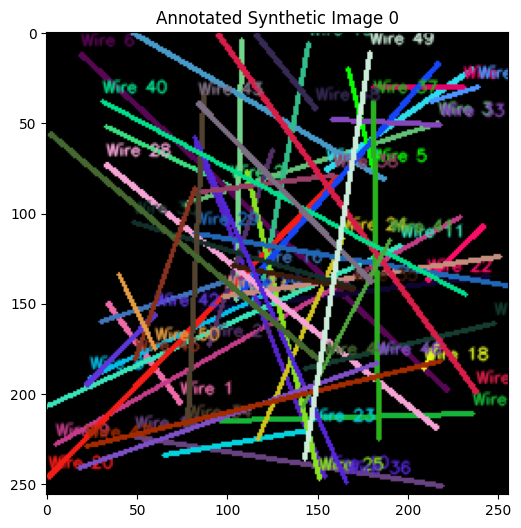

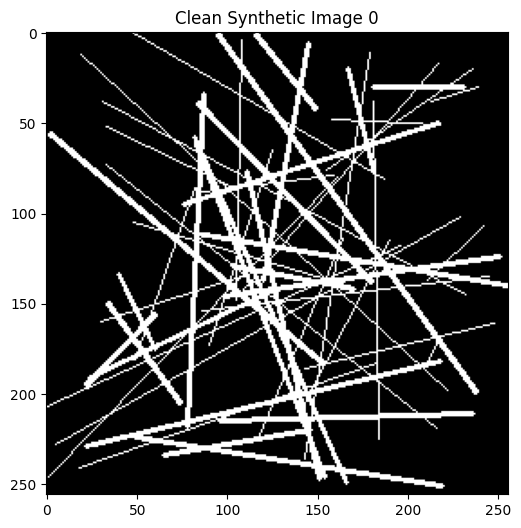

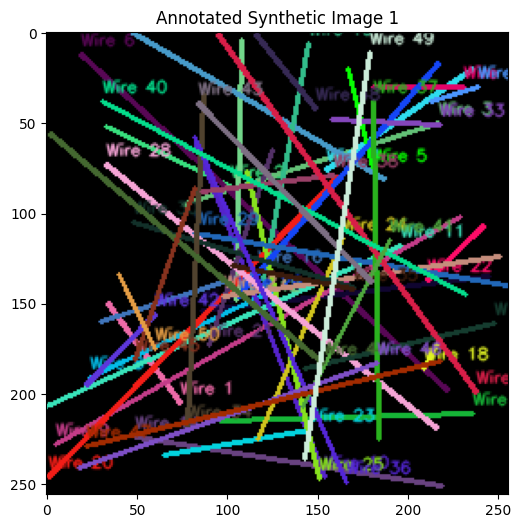

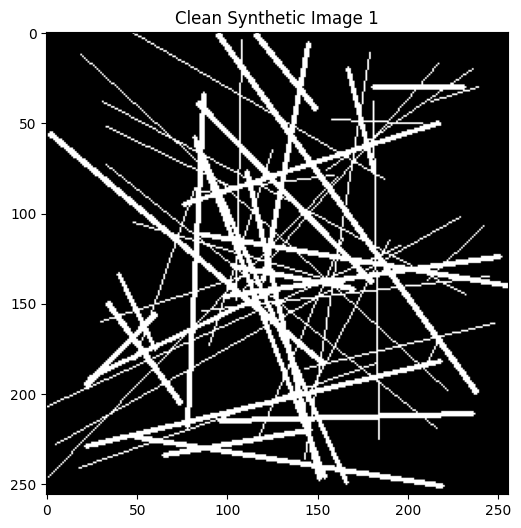

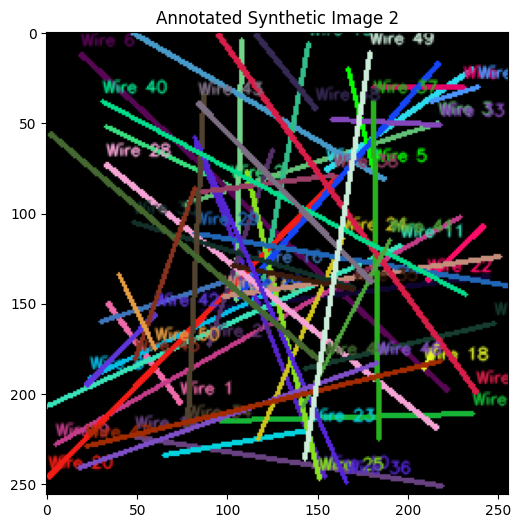

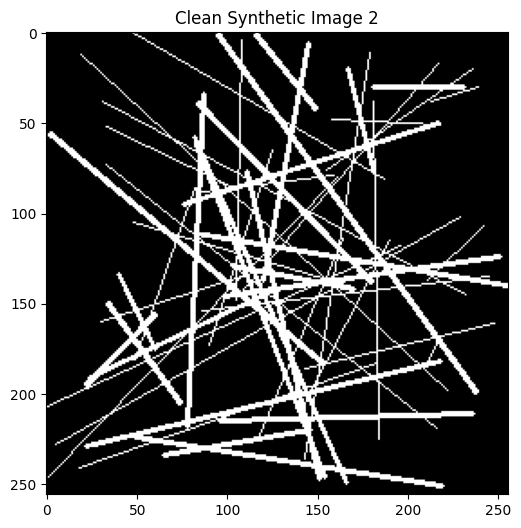

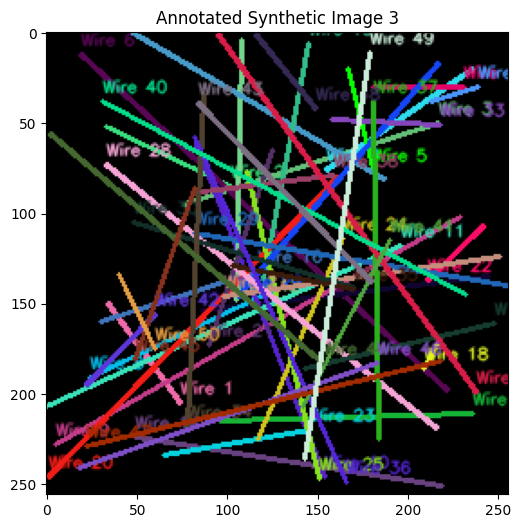

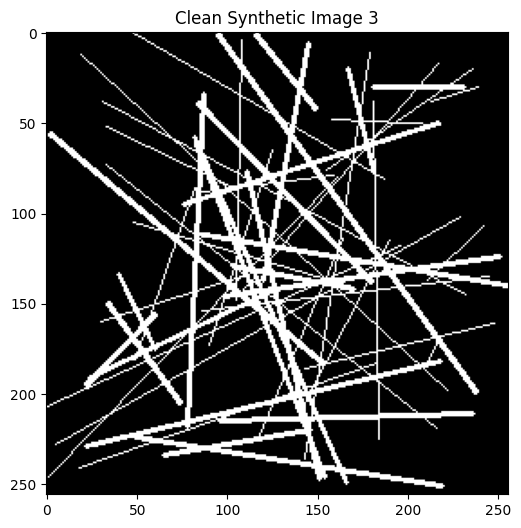

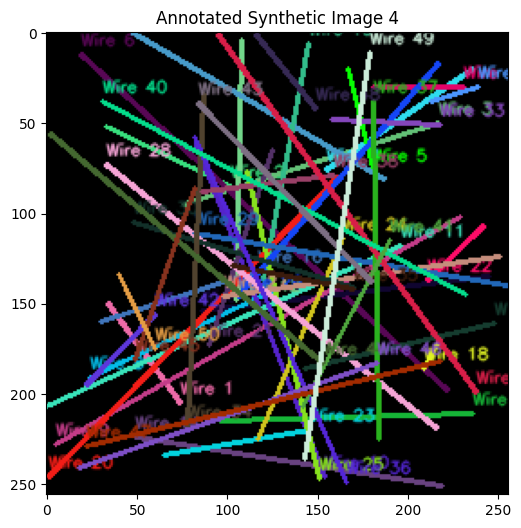

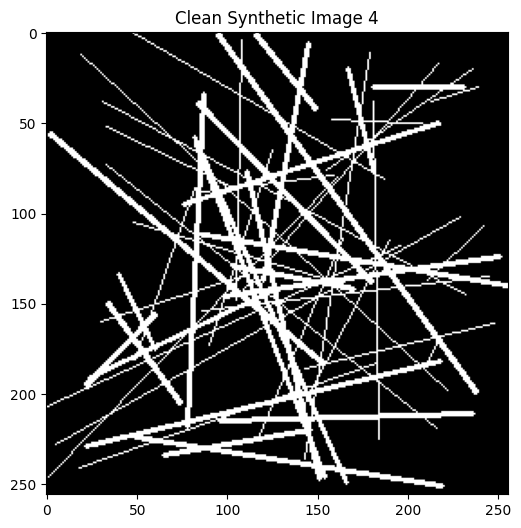

NameError: name 'num_synthetic_images' is not defined

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Directories to save synthetic SEM images
train_dir = "train"
test_dir = "test"
train_annotated_dir = "train_annotated_images"
test_annotated_dir = "test_annotated_images"

#creating directories for train and test pictures
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(train_annotated_dir, exist_ok=True)
os.makedirs(test_annotated_dir, exist_ok=True)

# Function to generate random colors
def generate_random_color():
    """
    Generate a random color in BGR format.
    """
    return tuple(np.random.randint(0, 256, 3).tolist())

# Function to generate and save synthetic SEM images
def generate_synthetic_sem_image(image_size=(256, 256), num_nanowires=50):
    """
    Generate a synthetic SEM-like image with random nanowire patterns.
    """
    image = np.zeros(image_size, dtype=np.uint8)

    labels = []  # Store the start and end points for labeling

    for wire_idx in range(num_nanowires):
        # Random start and end points for "nanowires"
        x1, y1 = np.random.randint(0, image_size[1]), np.random.randint(0, image_size[0])
        x2, y2 = np.random.randint(0, image_size[1]), np.random.randint(0, image_size[0])

        # Draw a white line (simulating a nanowire)
        thickness = np.random.randint(1, 3)  # Random thickness
        cv2.line(image, (x1, y1), (x2, y2), color=255, thickness=thickness)

        # Store the start and end points with a random color
        labels.append(((x1, y1), (x2, y2), f"Wire {wire_idx + 1}", generate_random_color()))

    clean_image = image

    return clean_image, labels

# Function to annotate an image with colored labels and underlines
def annotate_image(image, labels):
    """
    Annotate the image with labels and underline nanowires in unique colors.
    """
    annotated_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored text and lines
    for start, end, label, color in labels:
        x, y = start
        x2, y2 = end
        
        # Draw the underline (nanowire color)
        cv2.line(annotated_image, (x, y), (x2, y2), color=color, thickness=2)
        
        # Add the label near the starting point
        cv2.putText(
            annotated_image, label, (x, y - 5), 
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
            fontScale=0.3, color=color, thickness=1, lineType=cv2.LINE_AA
        )
    return annotated_image

# Generate and save synthetic SEM images and put them in train
num_train = 1000
for i in range(num_train):
    # Generate image and labels
    train_image, labels = generate_synthetic_sem_image(image_size=(256, 256), num_nanowires=50)
    
    # Save unannotated image
    unannotated_path_train = os.path.join(train_dir, f"synthetic_train_{i:03d}.png")
    cv2.imwrite(unannotated_path_train, train_image)
    
    # Annotate image and save
    annotated_image_train = annotate_image(train_image, labels)
    annotated_path_train = os.path.join(train_annotated_dir, f"synthetic_annotated_train_{i:03d}.png")
    cv2.imwrite(annotated_path_train, annotated_image_train)

# Generate and save synthetic SEM images and put them in test
num_test = 200
for i in range(num_test):
    # Generate image and labels
    test_image, labels = generate_synthetic_sem_image(image_size=(256, 256), num_nanowires=50)
    
    # Save unannotated image
    unannotated_path_test = os.path.join(test_dir, f"synthetic_test_{i:03d}.png")
    cv2.imwrite(unannotated_path_test, test_image)
    
    # Annotate image and save
    annotated_image_test = annotate_image(test_image, labels)
    annotated_path_test = os.path.join(test_annotated_dir, f"synthetic_annotated_test_{i:03d}.png")
    cv2.imwrite(annotated_path_test, annotated_image_test)



    
    # Display a few synthetic images
    if i < 5:  # Display only the first 5 images for preview
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(annotated_image_train, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.title(f"Annotated Synthetic Image {i}")
        plt.show()

    if i < 5:  # Display only the first 5 images for preview
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.title(f"Clean Synthetic Image {i}")
        plt.show()

print(f"Saved {num_synthetic_images} synthetic SEM images in {synthetic_output_dir}")
print(f"Saved {num_synthetic_images} annotated SEM images in {annotated_output_dir}")


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 32, 32, 128)         │          92,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 256, 256, 1)         │         240,129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 32, 32, 128)         │          92,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 256, 256, 1)         │         240,129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.8234 - loss: 0.1767 - val_accuracy: 0.8241 - val_loss: 0.1206
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.8244 - loss: 0.1188 - val_accuracy: 0.8388 - val_loss: 0.1055
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.8486 - loss: 0.1020 - val_accuracy: 0.8639 - val_loss: 0.0935
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.8715 - loss: 0.0903 - val_accuracy: 0.8833 - val_loss: 0.0841
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.8868 - loss: 0.0823 - val_accuracy: 0.8959 - val_loss: 0.0772
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.8983 - loss: 0.0755 - val_accuracy: 0.9060 - val_loss: 0.0711
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9078 - loss: 0.0695 - val_accuracy: 0.9130 - val_loss: 0.0668
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9136 - loss: 0.0657 - val_accuracy: 0.9181 - val_loss

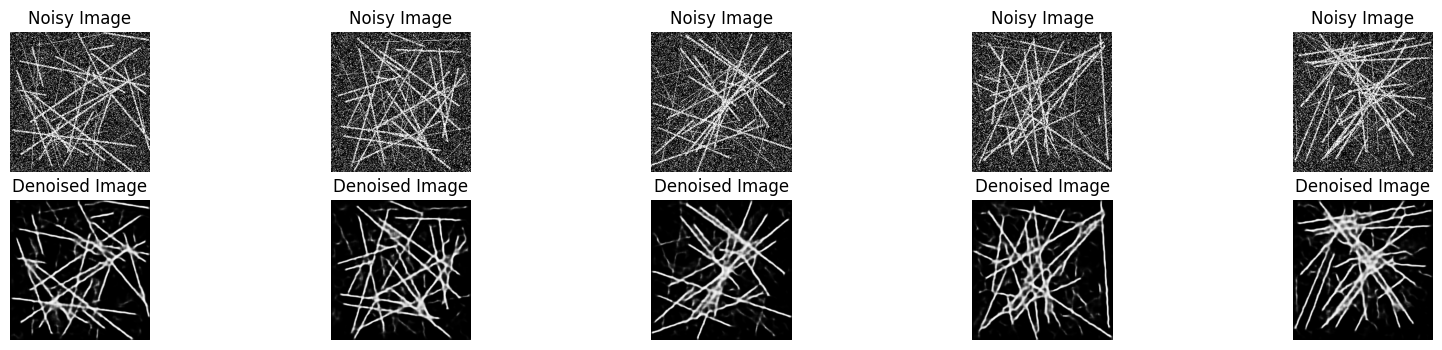

In [2]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import plot_model
import matplotlib.image as img
import os
from PIL import Image
import matplotlib.pyplot as plt


def load_images_from_directory(directory, target_size=(256, 256)):
    """
    Loads images from a single directory (no subfolders).
    
    Args:
        directory (str): Path to the directory containing images.
        target_size (tuple): Target size for resizing images (width, height).

    Returns:
        X (np.array): Array of images.
    """
    images = []
    for filename in sorted(os.listdir(directory)):  # Ensure consistent ordering
        file_path = os.path.join(directory, filename)
        if not os.path.isfile(file_path):  # Skip if it's not a file
            continue

        try:
            # Open image, convert to grayscale, and resize
            img = Image.open(file_path).convert('L')  # 'L' converts to grayscale
            img = img.resize(target_size)
            img_array = np.array(img, dtype=np.float32)  # Convert to float32 for consistency
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")

    X = np.array(images)
    X = np.expand_dims(X, axis=-1)  # Add channel dimension for convolution
    return X


# Load train and test datasets
X_train = load_images_from_directory('./train', target_size=(256, 256))
X_test = load_images_from_directory('./test', target_size=(256, 256))

# Normalize the images to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

noise_factor=0.5

# Generate noise for training and testing sets separately
noise_train = np.random.normal(0, noise_factor, X_train.shape).astype(np.float32)
noise_test = np.random.normal(0, noise_factor, X_test.shape).astype(np.float32)

# Add noise to the images
X_train_noisy = X_train + noise_train
X_test_noisy = X_test + noise_test

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


encoder = Sequential([
    Input(shape=(256,256,1)),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same')
])

decoder = Sequential([
    Conv2D(128, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(64, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(1, 3, activation='sigmoid', padding='same')  # Output shape (256, 256, 1)
])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mean_squared_error", optimizer='adam')
autoencoder.summary()
autoencoder = Sequential([encoder, decoder])

#compile the model
autoencoder.compile(loss="mean_squared_error", optimizer='adam', metrics=['accuracy'])
#print the model summary
autoencoder.summary()
#fit the model
autoencoder.fit(X_train_noisy, X_train, epochs=10, shuffle=True, validation_data=[X_test_noisy, X_test])


# Get predictions from the autoencoder on the noisy test set
decoded_images = autoencoder.predict(X_test_noisy)

# Plot some images
n = 5  # Display the first 3 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(256, 256), cmap='gray')
    ax.set_title("Noisy Image")
    ax.axis('off')

    # Display reconstructed (denoised) image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(256, 256), cmap='gray')
    ax.set_title("Denoised Image")
    ax.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


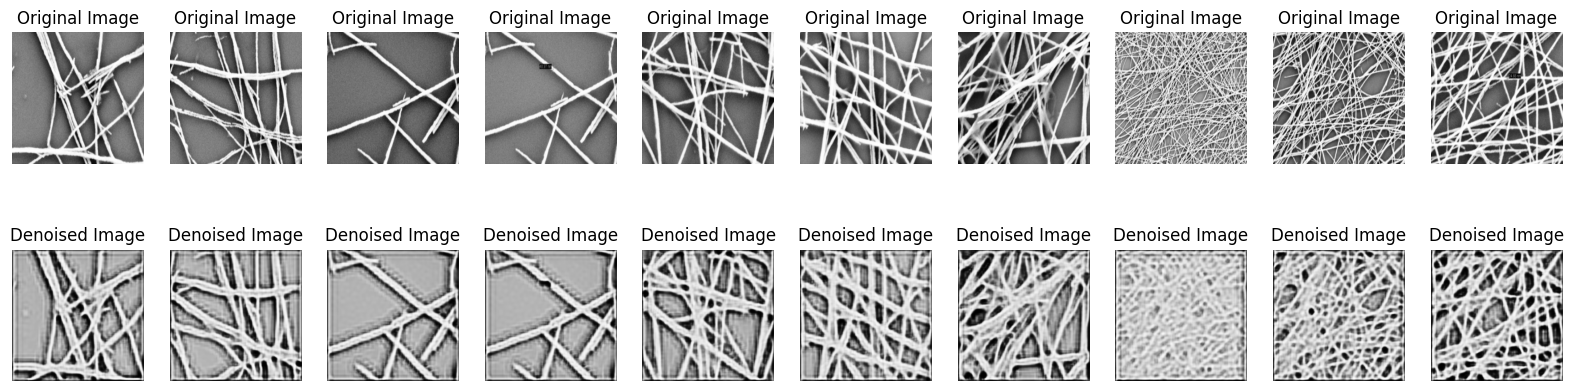

In [17]:
def preprocess_images(directory, target_size=(256, 256), crop_percent=0.1):
    """
    Prepares images for input into the trained autoencoder, including cropping.

    Args:
        directory (str): Path to the directory containing images.
        target_size (tuple): Target size for resizing images (width, height).
        crop_percent (float): Fraction of the image height to crop from the bottom.

    Returns:
        np.array: Preprocessed and cropped images ready for prediction.
    """
    images = []
    for filename in sorted(os.listdir(directory)):  # Ensure consistent ordering
        file_path = os.path.join(directory, filename)
        if not os.path.isfile(file_path):  # Skip if it's not a file
            continue

        try:
            # Open image, convert to grayscale, and resize
            img = Image.open(file_path).convert('L')  # 'L' converts to grayscale
            img = img.resize(target_size)
            img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize to [0, 1]

            # Crop the bottom part of the image
            crop_height = int(target_size[1] * (1 - crop_percent))
            img_array = img_array[:crop_height, :]  # Keep only the top part of the image
            
            # Resize back to the target size after cropping to ensure input consistency
            img_array = cv2.resize(img_array, target_size, interpolation=cv2.INTER_AREA)
            images.append(img_array)
        except Exception as e:
            print(f"Error processing image {file_path}: {e}")

    X = np.array(images)
    X = np.expand_dims(X, axis=-1)  # Add channel dimension for convolution
    return X

new_images = preprocess_images('./new_images', target_size=(256, 256))

denoised_images = autoencoder.predict(new_images)

n = 10  # Number of images to display
plt.figure(figsize=(20, 8))
for i in range(n):

    # Display original image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(new_images[i].reshape(256, 256), cmap='gray')
    ax.set_title("Original Image")
    ax.axis('off')

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(256, 256), cmap='gray')
    ax.set_title("Denoised Image")
    ax.axis('off')

plt.show()



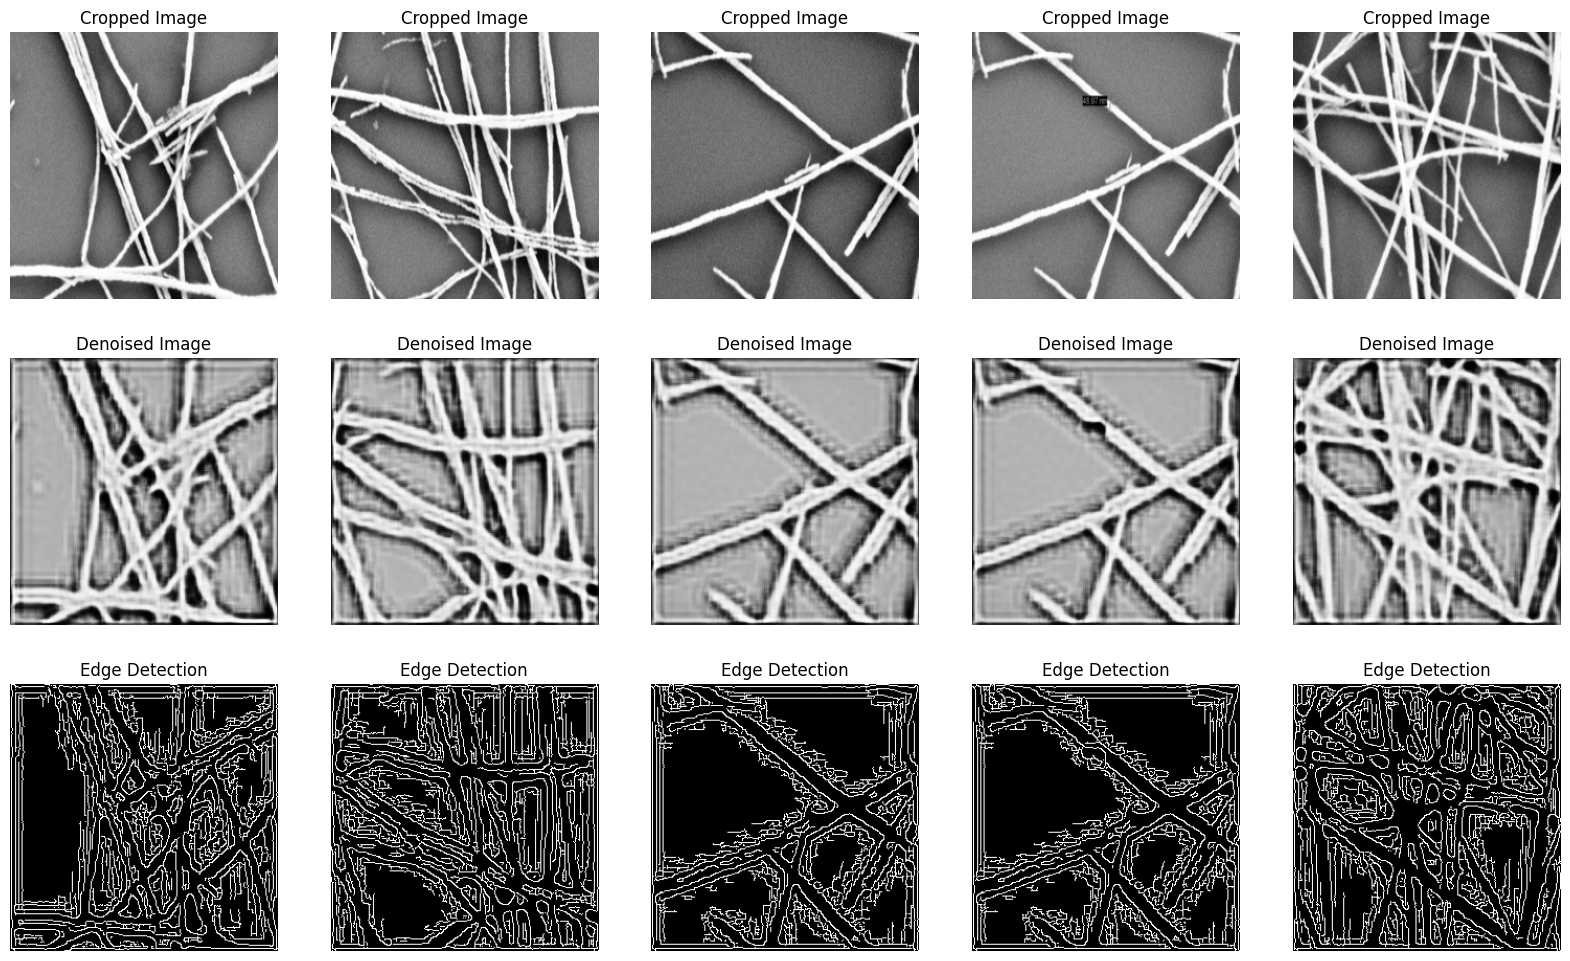

In [19]:
edges = []
for img in denoised_images:
    # Convert to uint8 format (Canny requires uint8 input)
    img_uint8 = (img.squeeze() * 255).astype(np.uint8)  # Remove channel dim and scale to [0, 255]
    edge_image = cv2.Canny(img_uint8, 50, 150)  # Apply Canny edge detection
    edges.append(edge_image)

# Convert edges list to numpy array for visualization
edges = np.array(edges)

# Plot the results
n = 5  # Number of images to display
plt.figure(figsize=(20, 12))
for i in range(n):

    # Display original (cropped and resized) image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(new_images[i].reshape(256, 256), cmap='gray')
    ax.set_title("Cropped Image")
    ax.axis('off')

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(256, 256), cmap='gray')
    ax.set_title("Denoised Image")
    ax.axis('off')

    # Display edge-detected image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(edges[i], cmap='gray')
    ax.set_title("Edge Detection")
    ax.axis('off')

plt.show()